In [3]:
from math import pi
from math import sqrt
from math import cos
from math import sin
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve

def compute_N1_N2_D( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the position of the anchor of the struts
#   shared  : p1, p2, p3: defines the length of the struts

#   input   : theta
#   output  : N1, N2, D

    A2 = L3 * cos( theta ) - x1

    B2 = L3 * sin( theta )

    A3 = L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2

    B3 = L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2

    A1 = ( p2 ** 2 ) - ( p1 ** 2 ) - ( A2 ** 2 ) - ( B2 ** 2 )

    B1 = ( p3 ** 2 ) - ( p1 ** 2 ) - ( A3 ** 2 ) - ( B3 ** 2 )

    N1 =   B3 * A1 - B2 * B1

    N2 = - A3 * A1 + A2 * B1

    D = 2. * ( A2 * B3 - B2 * A3 )

    return N1, N2, D

def f( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : 0       if theta leads to a (theta,x,y) consistent with (p1,p2,p3)
#             .not. 0 if theta does not lead to a feasible solution

    N1, N2, D = compute_N1_N2_D( theta )

    return ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 )

#   return ( ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) * (( p2 ** 2 ) - ( p1 ** 2 ) - ( L3 * cos( theta ) - x1 ) ** 2 - ( ( L3 * sin( theta ) ) ** 2 )) - ( L3 * sin( theta ) ) * (( p3 ** 2 ) - ( p1 ** 2 ) - ( ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) ** 2 ) - ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) ** 2 )) ) ** 2 ) \
#   + ( ( - (L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2) * (( p2 ** 2 ) - ( p1 ** 2 ) - ( L3 * cos( theta ) - x1 ) ** 2 - ( ( L3 * sin( theta ) ) ** 2 )) + ( L3 * cos( theta ) - x1 ) * (( p3 ** 2 ) - ( p1 ** 2 ) - ( ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) ** 2 ) - ( (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) ** 2 )) ) **2 ) \
#   - 4 * ( p1 ** 2 ) * ( ( L3 * cos( theta ) - x1 ) * (L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2) \
#   - ( L3 * sin( theta ) ) * ( L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2 ) )**2


def compute_x_and_y( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : x, y: such that (theta, x, y) represents the position of the
#             platform

#   note: it does not make sense to call this routine if theta is not a root of
#   f(theta)

    N1, N2, D = compute_N1_N2_D( theta )

    x = N1 / D

    y = N2 / D

    if ( abs( ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 ) ) > 1e-4 ):
        print("warning: compute_x_and_y: theta is not a root of f(theta),"\
              "therefore the lengths of the struts (p1, p2, p3) and|",\
              "the positions (theta,x,y) of the platform are not consistent.")

    return x, y

def compute_platform_corners( theta ):

#   shared  : L2, L3, gamma: defines the shape the platorm
#   shared  : x1, x2, y2: defines the positions of the anchor of the struts
#   shared  : p1, p2, p3: defines the lengths of the struts

#   input   : theta
#   output  : u1, u2, u3, v1, v2, v3: the positions of the three corners (u1,v1),
#             (u2,v2), and (u3,v3) of our platform

    x, y = compute_x_and_y( theta )

    u1 = x
    u2 = x + L3 * cos( theta )
    u3 = x + L2 * cos( theta + gamma )
    v1 = y
    v2 = y + L3 * sin( theta )
    v3 = y + L2 * sin( theta + gamma )

    return u1, u2, u3, v1, v2, v3

def check_strut_lengths_from_corners( u1, u2, u3, v1, v2, v3):

#   shared  : x1, x2, y2: defines the positions of the anchor of the struts

#   input   : u1, u2, u3, v1, v2, v3: the positions of the three corners (u1,v1),
#             (u2,v2), and (u3,v3) of our platform

    p1 = sqrt( u1 ** 2 + v1 ** 2 )
    p2 = sqrt( ( u2 - x1 ) ** 2 + ( v2 ) ** 2 )
    p3 = sqrt( ( u3 - x2 ) ** 2 + ( v3 - y2 ) ** 2 )

    return p1, p2, p3

def plot_platform( u1, u2, u3, v1, v2, v3, ax ):

    ax.plot( [ u1, u2, u3, u1 ], [ v1, v2, v3, v1 ], '-r', linewidth=5 )

    ax.plot( [ u1 ], [ v1 ], 'om', markersize=10 )
    ax.plot( [  0 ], [  0 ], 'sm', markersize=10 )
    ax.plot( [ 0, u1 ], [ 0, v1 ], '-m', linewidth=2 )
    p1 = sqrt( u1**2 + v1 **2 )

    ax.plot( [ u2 ], [ v2 ], 'og', markersize=10 )
    ax.plot( [ x1 ], [  0 ], 'sg', markersize=10 )
    ax.plot( [ x1, u2 ], [ 0, v2 ], '-g', linewidth=2 )
    p2 = sqrt( ( u2 - x1 )**2 + ( v2 )**2 )

    ax.plot( [ u3 ], [ v3 ], 'ob', markersize=10 )
    ax.plot( [ x2 ], [ y2 ], 'sb', markersize=10 )
    ax.plot( [ x2, u3 ], [ y2, v3 ], '-b', linewidth=2 )
    p3 = sqrt( ( u3 - x2 )**2 + ( v3 - y2 )**2 )

    ax.set_aspect('equal', adjustable='box')

    ax.title.set_text( r"$\theta = $" + f"{theta:f}" )

    ax.set_xticks(np.arange(-10,10))
    ax.set_yticks(np.arange(-10,10))

    ax.grid()

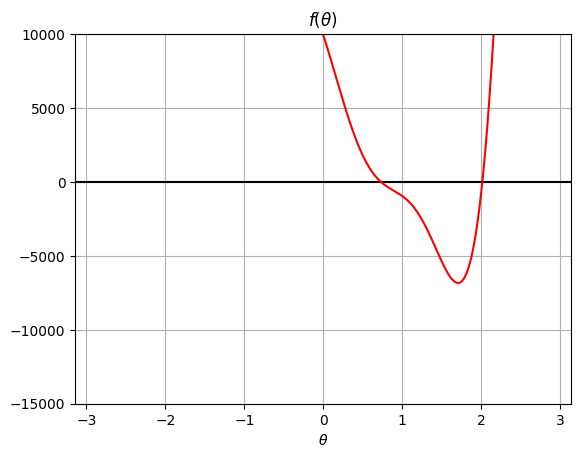

In [5]:
# set the dimensions of our platform

L2 = 3 * sqrt(2)

L3 = 3

gamma = pi/4

# set the positions of the anchors of the struts

x1 = 5

x2 = 0

y2 = 6

# set the lengths of the struts

p1 = 5

p2 = 2

p3 = 6

xx = np.linspace( -pi, pi, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k' );
xx = np.linspace( -pi, pi, 1000)
yy = [f(x) for x in xx]
plt.plot(xx, yy, '-r');
plt.title(r'$f(\theta)$')
plt.xlabel(r'$\theta$')
plt.xlim([ -pi, pi ])
plt.ylim([-15000., 10000.])
plt.grid()
plt.show()


In [6]:
initial_guesses = [ 0., 2. ]
roots = np.zeros( len( initial_guesses ) )
for i, x0 in enumerate( initial_guesses ):
    roots[i] = scipy.optimize.fsolve( f, x0 )[0]
    print( "scipy.optimize.fsolve found root theta = ", f"{roots[i]:10.6f}",\
           ", backward error = ", f"{abs( f( roots[i] ) ):5.1e}" )

scipy.optimize.fsolve found root theta =    0.732220 , backward error =  1.8e-12
scipy.optimize.fsolve found root theta =    2.015429 , backward error =  2.9e-11


<ipython-input-3-5314c75faa41>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A2 = L3 * cos( theta ) - x1
<ipython-input-3-5314c75faa41>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B2 = L3 * sin( theta )
<ipython-input-3-5314c75faa41>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A3 = L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2
<ipython-input-3-5314c75faa41>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a s

dimensions of platform:  L2 = 4.2426 ; L3 = 3.0000 gamma = 0.7854
position of anchors:     x1 = 5.0000 ; x2 = 0.0000 ; y2 = 6.0000
lengths of struts:       p1 = 5.0000 ; p2 = 2.0000 ; p3 = 6.0000

theta =  0.7322 ; (x,y) = ( 4.73 , -1.62 );
(u1,v1) = ( 4.73 , -1.62 ); (u2,v2) = ( 6.96 , 0.39 ); (u3,v3) = ( 4.96 , 2.62 ); 
lengths of struts (recomputed):       p1 = 5.0000 ; p2 = 2.0000 ; p3 = 6.0000
absolute (backward) error on strut lengths:  5.33e-16
relative backward error = | f(theta) |    :  1.82e-12

theta =  2.0154 ; (x,y) = ( 4.81 , -1.36 );
(u1,v1) = ( 4.81 , -1.36 ); (u2,v2) = ( 3.52 , 1.35 ); (u3,v3) = ( 0.81 , 0.06 ); 
lengths of struts (recomputed):       p1 = 5.0000 ; p2 = 2.0000 ; p3 = 6.0000
absolute (backward) error on strut lengths:  0.00e+00
relative backward error = | f(theta) |    :  2.91e-11


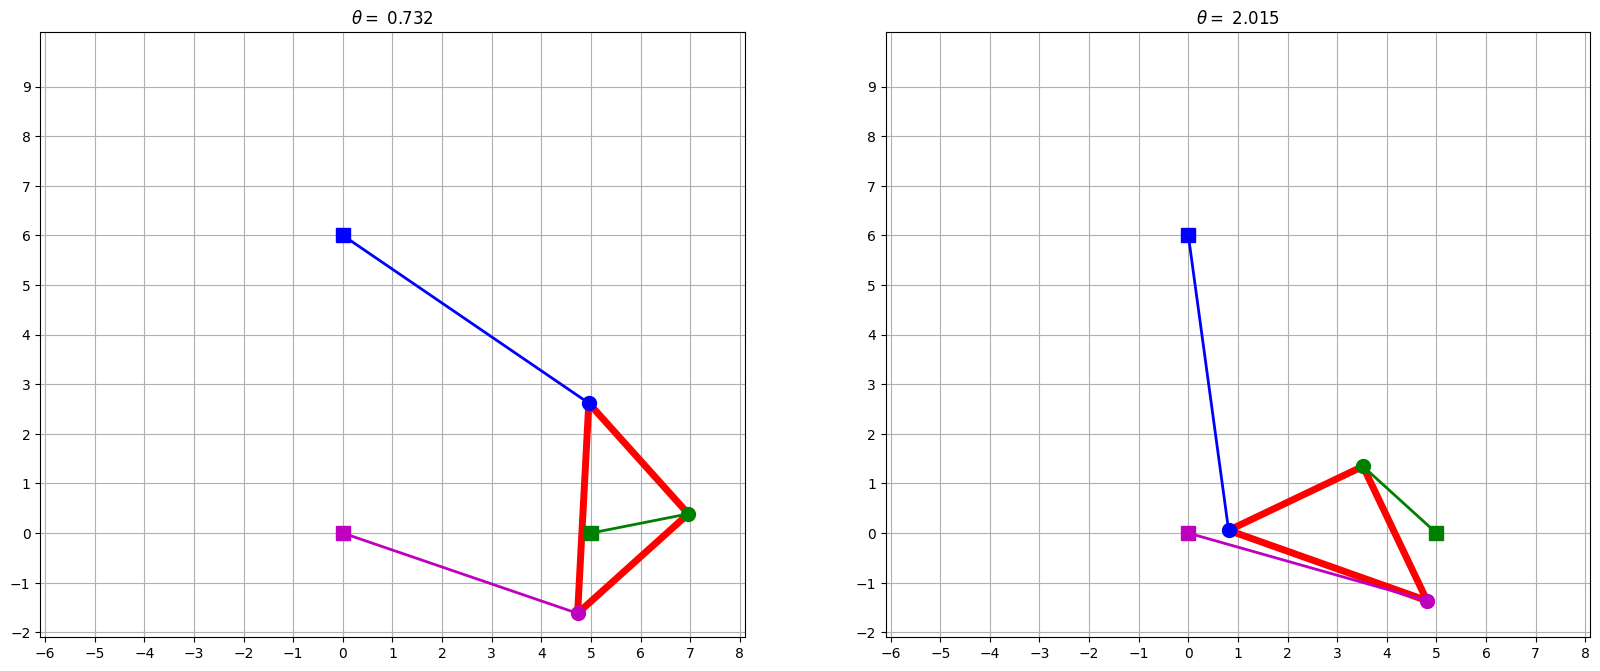

In [7]:
print( "dimensions of platform: ", "L2 =", f"{L2:6.4f}", "; L3 =", f"{L3:6.4f}", "gamma =", f"{gamma:6.4f}"  )
print( "position of anchors:    ", "x1 =", f"{x1:6.4f}", "; x2 =", f"{x2:6.4f}", "; y2 =", f"{y2:6.4f}" )
print( "lengths of struts:      ", "p1 =", f"{p1:6.4f}", "; p2 =", f"{p2:6.4f}", "; p3 =", f"{p3:6.4f}" )


save_plt_rcParams = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [ 20., 20. ]

fig, ax = plt.subplots(1, len(roots) )

for theta, ax1 in zip( roots, ax ):
    plot_platform( *compute_platform_corners( theta ), ax1 )
    ax1.set_xlim([ -6.1, 8.1 ])
    ax1.set_ylim([ -2.1, 10.1 ])
    ax1.title.set_text( r"$\theta = $" + f"{theta:6.3f}" )

plt.rcParams['figure.figsize'] = save_plt_rcParams


for theta in roots:
    x, y = compute_x_and_y( theta )
    print("\ntheta = ", f"{theta:6.4f}", "; (x,y) = (", f"{x:4.2f}",",",f"{y:4.2f}",");")
    u1, u2, u3, v1, v2, v3 = compute_platform_corners( theta )
    print("(u1,v1) = (", f"{u1:4.2f}",",",f"{v1:4.2f}","); "\
          "(u2,v2) = (", f"{u2:4.2f}",",",f"{v2:4.2f}","); "\
          "(u3,v3) = (", f"{u3:4.2f}",",",f"{v3:4.2f}","); ")

    p1x, p2x, p3x = check_strut_lengths_from_corners( *compute_platform_corners( theta ) )
    print( "lengths of struts (recomputed):      ", "p1 =", f"{p1x:6.4f}", "; p2 =", f"{p2x:6.4f}", "; p3 =", f"{p3x:6.4f}" )
    print( "absolute (backward) error on strut lengths: ", f"{max( [ abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1), abs( p1 - p1x )/abs(p1) ] ):6.2e}" )
    print( "relative backward error = | f(theta) |    : ", f"{abs(f(theta)):6.2e}" )